In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import keras
import sklearn
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout
from keras.constraints import maxnorm
from math import sqrt

Using TensorFlow backend.


In [2]:
df1 = pd.read_csv('traincleaned.csv')

In [3]:
df1.head()

,0,1,2,3,4,5,6,7,8,9,loan_amount,applicant_income,rate_spread
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.025077,0.042033,1
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.122230,-0.298088,2
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.178347,-0.375830,3
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.600277,-0.346677,6
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.824745,-0.259217,4


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
0                   200000 non-null float64
1                   200000 non-null float64
2                   200000 non-null float64
3                   200000 non-null float64
4                   200000 non-null float64
5                   200000 non-null float64
6                   200000 non-null float64
7                   200000 non-null float64
8                   200000 non-null float64
9                   200000 non-null float64
loan_amount         200000 non-null float64
applicant_income    200000 non-null float64
rate_spread         200000 non-null int64
dtypes: float64(12), int64(1)
memory usage: 19.8 MB


In [5]:
df1.describe()

,0,1,2,3,4,5,6,7,8,9,loan_amount,applicant_income,rate_spread
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,2.000000e+05,2.000000e+05,200000.000000
mean,0.453525,0.531540,0.005410,0.009525,0.846310,0.152500,0.001190,0.730515,0.056365,0.213120,3.992973e-17,2.617209e-16,1.974370
std,0.497837,0.499005,0.073354,0.097130,0.360652,0.359506,0.034476,0.443693,0.230626,0.409513,1.000003e+00,1.000003e+00,1.593451
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.930963e-01,-6.965148e-01,1.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.301305e-01,-3.175233e-01,1.000000
50%,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-1.864135e-01,-1.620397e-01,1.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.555084e-01,7.118587e-02,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.689038e+01,9.687922e+01,8.000000


In [6]:
df1.shape

(200000, 13)

In [7]:
array = df1.values

In [8]:
type(array)

numpy.ndarray

In [9]:
X = array[:,0:12]
y = array[:,12]

In [10]:
X.shape

(200000, 12)

In [11]:
y.shape

(200000,)

In [21]:
model = ElasticNet(alpha=0.02)

In [22]:
model.fit(X,y)

ElasticNet(alpha=0.02, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [23]:
model.coef_

array([ 0.63121817, -0.15283855, -0.        , -0.        , -0.95273271,
        0.85864342,  0.        , -0.        ,  0.81898362, -0.02399645,
       -0.14351131,  0.00706687])

In [24]:
model.intercept_

2.4036527913391104

In [25]:
X_test = pd.read_csv('testmodified.csv')

In [26]:
X_test.head()

,0,1,2,3,4,5,6,7,8,9,loan_amount,applicant_income
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.665492,-0.218602
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.185659,0.774446
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.213116,0.273193
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.185004,-0.209144
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.239917,0.140787


In [27]:
X_test.shape

(200000, 12)

In [28]:
y_predict = model.predict(X_test)

In [29]:
y_predict

array([3.98747523, 2.03697054, 2.05348439, ..., 0.86552773, 1.32323794,
       1.19804857])

In [30]:
y_predict.shape

(200000,)

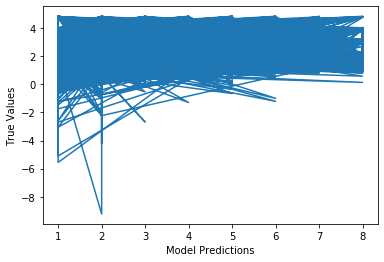

In [31]:
plt.plot(y, y_predict)
plt.xlabel('Model Predictions')
plt.ylabel('True Values')
plt.show()

In [32]:
rrprediction = pd.DataFrame(y_predict)

In [33]:
rrprediction

,0
0,3.987475
1,2.036971
2,2.053484
3,2.107210
4,2.093567
...,...
199995,2.141104
199996,1.845159
199997,0.865528
199998,1.323238


In [34]:
rrprediction.to_csv('rrresult.csv')

In [35]:
MSE = mean_squared_error(y,y_predict)
print("Mean Squared Error is", MSE)

Mean Squared Error is 3.387128815055138


In [36]:
RMSE = format(np.sqrt(MSE),'.3f')
print("RMSE is", RMSE)

RMSE is 1.840


In [37]:
MAE = mean_absolute_error(y,y_predict)
print("MAE is", MAE)

MAE is 1.293484968407733


In [38]:
r2 = r2_score(y,y_predict)
print("R2 score is", r2)

R2 score is -0.3340020856113721
